<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('amesHousePrice.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
data.shape

(1460, 81)

In [16]:
data.isna().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64

In [28]:
df = data.dropna(axis=1)

In [29]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [51]:
y = df['SalePrice']   

In [53]:
df = df.drop(columns=['Id', 'SalePrice'])

In [30]:
!pip install category_encoders

    100% |████████████████████████████████| 102kB 22.1MB/s a 0:00:01
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [54]:
from category_encoders import OrdinalEncoder

In [55]:
encoder = OrdinalEncoder()

In [56]:
encoder.fit(df)

OrdinalEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour',
                     'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                     'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                     'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                     'ExterQual', 'ExterCond', 'Foundation', 'Heating',
                     'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
                     'PavedDrive', 'SaleType', 'SaleCond...
NaN    -2
dtype: int64},
                        {'col': 'PavedDrive', 'data_type': dtype('O'),
                         'mapping': Y      1
N      2
P      3
NaN   -2
dtype: int64},
                        {'col': 'SaleType', 'data_type': dtype('O'),
                         'mapping': WD       1
New      2
COD      3
ConLD    4
ConLI    5
CWD      6
ConLw    7
Con      8
Oth      9
NaN     -2
dtype: int64},
                        {'col': 'SaleCondition', 'data_type': dtype('O'),
       

In [57]:
coded = encoder.transform(df)

In [58]:
coded.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,1,8450,1,1,1,1,1,1,1,...,61,0,0,0,0,0,2,2008,1,1
1,20,1,9600,1,1,1,1,2,1,2,...,0,0,0,0,0,0,5,2007,1,1
2,60,1,11250,1,2,1,1,1,1,1,...,42,0,0,0,0,0,9,2008,1,1
3,70,1,9550,1,2,1,1,3,1,3,...,35,272,0,0,0,0,2,2006,1,2
4,60,1,14260,1,2,1,1,2,1,4,...,84,0,0,0,0,0,12,2008,1,1


In [59]:
from sklearn.preprocessing import Normalizer

In [60]:
normie = Normalizer()

In [61]:
normie.fit(coded)

Normalizer(copy=True, norm='l2')

In [66]:
X = normie.transform(coded)

In [68]:
X.shape

(1460, 60)

In [69]:
len(X[0])

60

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(60,input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mae', 'mse'])
model.fit(X,y, epochs=500)

Epoch 1/500
1460/1460 [==============================] - 1s 372us/sample - loss: 39039094705.4466 - mean_absolute_error: 180920.7188 - mean_squared_error: 39039094784.0000
Epoch 2/500
1460/1460 [==============================] - 0s 92us/sample - loss: 39038151076.8219 - mean_absolute_error: 180918.0781 - mean_squared_error: 39038152704.0000
Epoch 3/500
1460/1460 [==============================] - 0s 91us/sample - loss: 39034280008.9425 - mean_absolute_error: 180907.3125 - mean_squared_error: 39034273792.0000
Epoch 4/500
1460/1460 [==============================] - 0s 92us/sample - loss: 39022504940.3616 - mean_absolute_error: 180874.7188 - mean_squared_error: 39022510080.0000
Epoch 5/500
1460/1460 [==============================] - 0s 91us/sample - loss: 38993752030.3343 - mean_absolute_error: 180794.9531 - mean_squared_error: 38993756160.0000
Epoch 6/500
1460/1460 [==============================] - 0s 92us/sample - loss: 38934026380.2740 - mean_absolute_error: 180628.9844 - mean_squar

1460/1460 [==============================] - 0s 92us/sample - loss: 6604218990.8164 - mean_absolute_error: 58598.3945 - mean_squared_error: 6604218880.0000
Epoch 50/500
1460/1460 [==============================] - 0s 92us/sample - loss: 6588435176.8548 - mean_absolute_error: 58512.5273 - mean_squared_error: 6588435456.0000
Epoch 51/500
1460/1460 [==============================] - 0s 92us/sample - loss: 6571152630.8822 - mean_absolute_error: 58474.9023 - mean_squared_error: 6571152896.0000
Epoch 52/500
1460/1460 [==============================] - 0s 92us/sample - loss: 6555093453.5014 - mean_absolute_error: 58343.8359 - mean_squared_error: 6555094016.0000
Epoch 53/500
1460/1460 [==============================] - 0s 92us/sample - loss: 6537816501.6548 - mean_absolute_error: 58350.9805 - mean_squared_error: 6537816576.0000
Epoch 54/500
1460/1460 [==============================] - 0s 92us/sample - loss: 6521775738.0384 - mean_absolute_error: 58190.7344 - mean_squared_error: 6521775616.0000

1460/1460 [==============================] - 0s 89us/sample - loss: 5777479927.5836 - mean_absolute_error: 54739.8594 - mean_squared_error: 5777479680.0000
Epoch 98/500
1460/1460 [==============================] - 0s 92us/sample - loss: 5756880654.0274 - mean_absolute_error: 54582.5000 - mean_squared_error: 5756879872.0000
Epoch 99/500
1460/1460 [==============================] - 0s 92us/sample - loss: 5741562952.9425 - mean_absolute_error: 54381.5352 - mean_squared_error: 5741563392.0000
Epoch 100/500
1460/1460 [==============================] - 0s 92us/sample - loss: 5723722457.4247 - mean_absolute_error: 54546.9570 - mean_squared_error: 5723722752.0000
Epoch 101/500
1460/1460 [==============================] - 0s 92us/sample - loss: 5703635715.5068 - mean_absolute_error: 54341.9570 - mean_squared_error: 5703634944.0000
Epoch 102/500
1460/1460 [==============================] - 0s 92us/sample - loss: 5688770214.9260 - mean_absolute_error: 54301.3516 - mean_squared_error: 5688770560.0

1460/1460 [==============================] - 0s 91us/sample - loss: 4911381550.2904 - mean_absolute_error: 49849.7969 - mean_squared_error: 4911380992.0000
Epoch 146/500
1460/1460 [==============================] - 0s 91us/sample - loss: 4890646607.2548 - mean_absolute_error: 49596.0586 - mean_squared_error: 4890647040.0000
Epoch 147/500
1460/1460 [==============================] - 0s 97us/sample - loss: 4873711154.8493 - mean_absolute_error: 49627.6211 - mean_squared_error: 4873711616.0000
Epoch 148/500
1460/1460 [==============================] - 0s 91us/sample - loss: 4853393879.6712 - mean_absolute_error: 49262.2461 - mean_squared_error: 4853393408.0000
Epoch 149/500
1460/1460 [==============================] - 0s 90us/sample - loss: 4834620743.5397 - mean_absolute_error: 49316.2617 - mean_squared_error: 4834621440.0000
Epoch 150/500
1460/1460 [==============================] - 0s 91us/sample - loss: 4813918123.8356 - mean_absolute_error: 49243.1250 - mean_squared_error: 4813918208

1460/1460 [==============================] - 0s 93us/sample - loss: 3971425460.9534 - mean_absolute_error: 44425.0508 - mean_squared_error: 3971424768.0000
Epoch 194/500
1460/1460 [==============================] - 0s 91us/sample - loss: 3951789712.4822 - mean_absolute_error: 44206.2500 - mean_squared_error: 3951789824.0000
Epoch 195/500
1460/1460 [==============================] - 0s 92us/sample - loss: 3931797157.5233 - mean_absolute_error: 43975.3477 - mean_squared_error: 3931796480.0000
Epoch 196/500
1460/1460 [==============================] - 0s 92us/sample - loss: 3914727013.6986 - mean_absolute_error: 43942.3789 - mean_squared_error: 3914727424.0000
Epoch 197/500
1460/1460 [==============================] - 0s 91us/sample - loss: 3895119266.7178 - mean_absolute_error: 43800.7695 - mean_squared_error: 3895119104.0000
Epoch 198/500
1460/1460 [==============================] - 0s 89us/sample - loss: 3877320953.6877 - mean_absolute_error: 43922.5508 - mean_squared_error: 3877321728

1460/1460 [==============================] - 0s 92us/sample - loss: 3163386913.6658 - mean_absolute_error: 38940.1328 - mean_squared_error: 3163387136.0000
Epoch 242/500
1460/1460 [==============================] - 0s 91us/sample - loss: 3150266804.2521 - mean_absolute_error: 38640.7852 - mean_squared_error: 3150266624.0000
Epoch 243/500
1460/1460 [==============================] - 0s 90us/sample - loss: 3135641147.9671 - mean_absolute_error: 38830.1094 - mean_squared_error: 3135641600.0000
Epoch 244/500
1460/1460 [==============================] - 0s 93us/sample - loss: 3123470737.8849 - mean_absolute_error: 38656.4258 - mean_squared_error: 3123470592.0000
Epoch 245/500
1460/1460 [==============================] - 0s 92us/sample - loss: 3106124643.2438 - mean_absolute_error: 38530.7891 - mean_squared_error: 3106123776.0000
Epoch 246/500
1460/1460 [==============================] - 0s 91us/sample - loss: 3095546079.0356 - mean_absolute_error: 38463.3398 - mean_squared_error: 3095546368

1460/1460 [==============================] - 0s 92us/sample - loss: 2620135345.4466 - mean_absolute_error: 34498.8672 - mean_squared_error: 2620134912.0000
Epoch 289/500
1460/1460 [==============================] - 0s 93us/sample - loss: 2611646713.6877 - mean_absolute_error: 34427.9180 - mean_squared_error: 2611646720.0000
Epoch 290/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2603026241.2274 - mean_absolute_error: 34398.5547 - mean_squared_error: 2603026176.0000
Epoch 291/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2596558488.8986 - mean_absolute_error: 34157.5039 - mean_squared_error: 2596558848.0000
Epoch 292/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2584757682.8493 - mean_absolute_error: 34360.8047 - mean_squared_error: 2584757760.0000
Epoch 293/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2576317775.9562 - mean_absolute_error: 34218.0430 - mean_squared_error: 2576317952

1460/1460 [==============================] - 0s 91us/sample - loss: 2276161373.2822 - mean_absolute_error: 31709.0469 - mean_squared_error: 2276161280.0000
Epoch 337/500
1460/1460 [==============================] - 0s 90us/sample - loss: 2273561834.2575 - mean_absolute_error: 31613.2598 - mean_squared_error: 2273561856.0000
Epoch 338/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2263318569.7315 - mean_absolute_error: 31619.2031 - mean_squared_error: 2263318784.0000
Epoch 339/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2257039497.4685 - mean_absolute_error: 31462.1270 - mean_squared_error: 2257039360.0000
Epoch 340/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2251587771.2658 - mean_absolute_error: 31431.5020 - mean_squared_error: 2251587584.0000
Epoch 341/500
1460/1460 [==============================] - 0s 90us/sample - loss: 2245012989.1945 - mean_absolute_error: 31465.7695 - mean_squared_error: 2245012992

1460/1460 [==============================] - 0s 92us/sample - loss: 2017079420.4932 - mean_absolute_error: 29516.2910 - mean_squared_error: 2017079552.0000
Epoch 384/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2012084047.2548 - mean_absolute_error: 29491.3945 - mean_squared_error: 2012084096.0000
Epoch 385/500
1460/1460 [==============================] - 0s 91us/sample - loss: 2007182962.3233 - mean_absolute_error: 29428.4902 - mean_squared_error: 2007182976.0000
Epoch 386/500
1460/1460 [==============================] - 0s 92us/sample - loss: 2001141364.7781 - mean_absolute_error: 29445.0566 - mean_squared_error: 2001141376.0000
Epoch 387/500
1460/1460 [==============================] - 0s 94us/sample - loss: 2001475069.1945 - mean_absolute_error: 29406.1836 - mean_squared_error: 2001475200.0000
Epoch 388/500
1460/1460 [==============================] - 0s 92us/sample - loss: 1990517710.9041 - mean_absolute_error: 29331.2930 - mean_squared_error: 1990517504

1460/1460 [==============================] - 0s 91us/sample - loss: 1815465369.2493 - mean_absolute_error: 27809.1973 - mean_squared_error: 1815465344.0000
Epoch 432/500
1460/1460 [==============================] - 0s 93us/sample - loss: 1812911140.6466 - mean_absolute_error: 27827.2930 - mean_squared_error: 1812911232.0000
Epoch 433/500
1460/1460 [==============================] - 0s 91us/sample - loss: 1808998404.7342 - mean_absolute_error: 27769.8828 - mean_squared_error: 1808998528.0000
Epoch 434/500
1460/1460 [==============================] - 0s 94us/sample - loss: 1807909728.0877 - mean_absolute_error: 27768.8242 - mean_squared_error: 1807909632.0000
Epoch 435/500
1460/1460 [==============================] - 0s 92us/sample - loss: 1803029188.0329 - mean_absolute_error: 27720.2598 - mean_squared_error: 1803029248.0000
Epoch 436/500
1460/1460 [==============================] - 0s 91us/sample - loss: 1801639714.3671 - mean_absolute_error: 27696.0430 - mean_squared_error: 1801639808

1460/1460 [==============================] - 0s 92us/sample - loss: 1697786146.7178 - mean_absolute_error: 26824.3125 - mean_squared_error: 1697786368.0000
Epoch 480/500
1460/1460 [==============================] - 0s 92us/sample - loss: 1696121169.3589 - mean_absolute_error: 26821.3184 - mean_squared_error: 1696121088.0000
Epoch 481/500
1460/1460 [==============================] - 0s 91us/sample - loss: 1695908822.4438 - mean_absolute_error: 26811.8516 - mean_squared_error: 1695908864.0000
Epoch 482/500
1460/1460 [==============================] - 0s 90us/sample - loss: 1693007884.9753 - mean_absolute_error: 26792.0898 - mean_squared_error: 1693008384.0000
Epoch 483/500
1460/1460 [==============================] - 0s 91us/sample - loss: 1693387982.5534 - mean_absolute_error: 26782.4746 - mean_squared_error: 1693387904.0000
Epoch 484/500
1460/1460 [==============================] - 0s 92us/sample - loss: 1690132082.3233 - mean_absolute_error: 26741.5996 - mean_squared_error: 1690131968

In [106]:
model.history.history['mean_squared_error']

[39039095000.0,
 39038153000.0,
 39034274000.0,
 39022510000.0,
 38993756000.0,
 38934036000.0,
 38824837000.0,
 38643786000.0,
 38364080000.0,
 37957920000.0,
 37397650000.0,
 36653355000.0,
 35704890000.0,
 34531830000.0,
 33126273000.0,
 31483580000.0,
 29614617000.0,
 27545661000.0,
 25310837000.0,
 22975550000.0,
 20591880000.0,
 18243850000.0,
 16008289000.0,
 13969778000.0,
 12175619000.0,
 10667751000.0,
 9467873000.0,
 8565676000.0,
 7920199000.0,
 7488839000.0,
 7215126000.0,
 7046796000.0,
 6947529700.0,
 6887815700.0,
 6848461000.0,
 6821169000.0,
 6800634400.0,
 6782387700.0,
 6766372000.0,
 6750972400.0,
 6734032400.0,
 6718446000.0,
 6701922000.0,
 6685957000.0,
 6670077000.0,
 6653395500.0,
 6638736400.0,
 6621037600.0,
 6604219000.0,
 6588435500.0,
 6571153000.0,
 6555094000.0,
 6537816600.0,
 6521775600.0,
 6504987600.0,
 6487982000.0,
 6470361000.0,
 6454015000.0,
 6437677600.0,
 6419104300.0,
 6401870000.0,
 6383842000.0,
 6368418000.0,
 6350708000.0,
 6332047400.0,

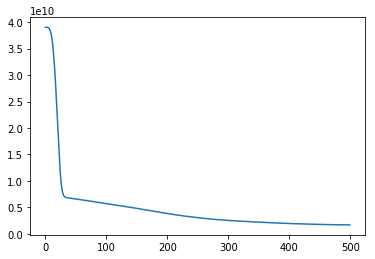

In [111]:
plt.plot(model.history.history['loss']);

In [190]:
from sklearn.model_selection import 

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [192]:
from sklearn import linear_model
import numpy as np
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit(X_train, y_train)

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [194]:
preds = reg.predict(X_test)

In [197]:
from sklearn.metrics import mean_squared_error as mse
mse(y_test, preds), model.history.history['mean_squared_error'][-1]

(2299257008.47652, 1637464000.0)

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [173]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

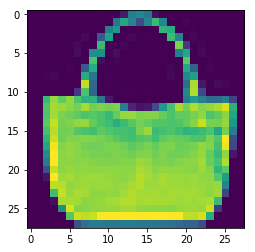

In [174]:
plt.imshow(x_train[100]);

In [175]:
# input image dimensions
img_rows, img_cols = 28, 28

In [176]:
x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Normalize Our Data
x_train = x_train / 255
x_test = x_test / 255

In [177]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [178]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

In [180]:
from tensorflow.keras import utils

In [181]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [182]:
y_train[:20]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [185]:
mdl = Sequential()
mdl.add(Dense(15,input_dim=784, activation='relu'))
mdl.add(Dense(10, activation='relu'))
mdl.add(Dense(30, activation='relu'))
mdl.add(Dense(10, activation='softmax'))
mdl.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
mdl.fit(x_train,y_train, epochs=50)

Epoch 1/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.6320 - acc: 0.7788
Epoch 2/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4515 - acc: 0.8403
Epoch 3/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.4175 - acc: 0.8519
Epoch 4/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3984 - acc: 0.8565
Epoch 5/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3839 - acc: 0.8622
Epoch 6/50
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3724 - acc: 0.8658
Epoch 7/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.3654 - acc: 0.8688
Epoch 8/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.3559 - acc: 0.8715
Epoch 9/50
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3485 - acc: 0.8726
Epoch 10/50
60000/60000 [==============================] - 6s 103us/sampl

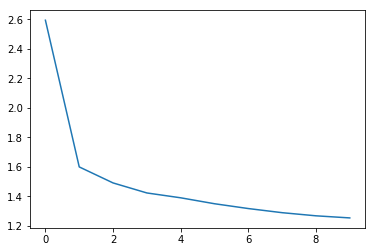

In [152]:
plt.plot(mdl.history.history['loss'])

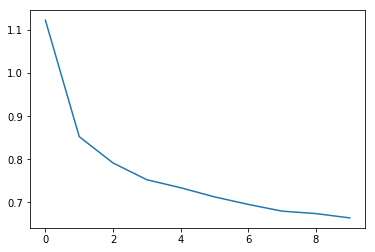

In [155]:
plt.plot(mdl.history.history['mean_absolute_error'])

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.